In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.loadtxt("signal_shape_webplotdigitizer.csv",delimiter=",")

x = data[:,0]
y = data[:,1]

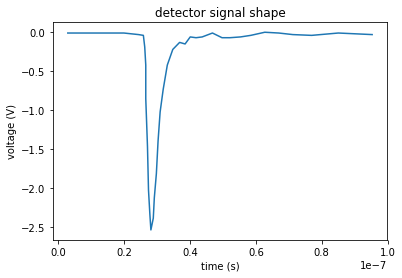

In [3]:
plt.plot(x,y)
plt.title("detector signal shape")
plt.xlabel("time (s)")
plt.ylabel("voltage (V)")
plt.show()

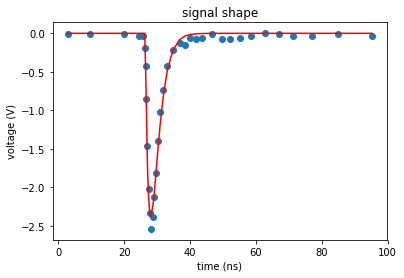

Q:     -2.183e-10
tau1:  1.683e-09
tau2:  1.683e-09
delay: 2.642e-08


In [13]:
from scipy.optimize import curve_fit

from sigproc_kit import * 


# no special delimiter needed for tsv
xdata = data[:,0]
ydata = data[:,1]

#plt.plot(xdata*1e9,ydata)

def func(x, Q, tau1, tau2, delay):
    return detector_signal_function(x, Q, tau1, tau2, delay)

popt, pcov = curve_fit(func, xdata, ydata, p0 = [-10e-12,1e-9,2e-9,10e-9])

plt.scatter(xdata*1e9,ydata)
plt.title("signal shape")
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.plot(xdata*1e9, func(xdata, *popt), 'r-')#,
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
#plt.legend()
plt.show()

print("Q:     {:3.3e}".format(popt[0]))
print("tau1:  {:3.3e}".format(popt[1]))
print("tau2:  {:3.3e}".format(popt[2]))
print("delay: {:3.3e}".format(popt[3]))